In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [3]:
df = pd.read_csv('J:/Data science/ML/Pyhon for ML/3.1 UNZIP_ME_FOR_NOTEBOOKS_V4/DATA/gene_expression.csv')

In [4]:
df.head()

,Gene One,Gene Two,Cancer Present
0,4.3,3.9,1
1,2.5,6.3,0
2,5.7,3.9,1
3,6.1,6.2,0
4,7.4,3.4,1


In [132]:
x = df.drop('Cancer Present',axis=1)
y = df['Cancer Present']

<AxesSubplot:xlabel='Gene One', ylabel='Gene Two'>

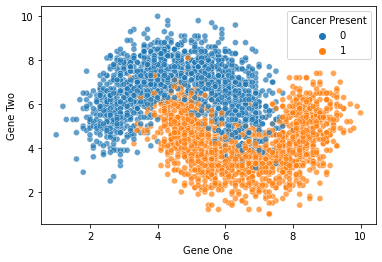

In [133]:
sns.scatterplot(data=df , x='Gene One' , y='Gene Two' , hue='Cancer Present',alpha=.7)

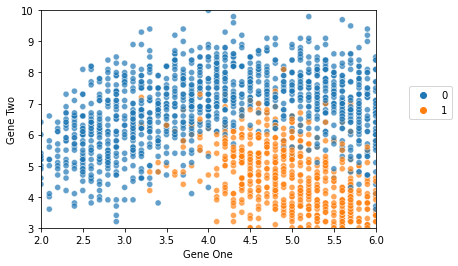

In [134]:
sns.scatterplot(data=df , x='Gene One' , y='Gene Two' , hue='Cancer Present',alpha=.7)
plt.xlim(2,6)
plt.ylim(3,10)
plt.legend(loc=(1.1,.5))

In [135]:
x_train , x_test , y_train , y_test = train_test_split(x,y,test_size=0.3,random_state=42)

In [136]:
scaler =StandardScaler()
scaled_x_train = scaler.fit_transform(x_train)
scaled_x_test = scaler.transform(x_test)

In [137]:
from sklearn.neighbors import KNeighborsClassifier

In [138]:
knn_model = KNeighborsClassifier(n_neighbors=1)
knn_model.fit(scaled_x_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [139]:
len(df)

3000

In [140]:
full_test = pd.concat([x_test,y_test],axis=1)

In [141]:
len(full_test)

900

<AxesSubplot:xlabel='Gene One', ylabel='Gene Two'>

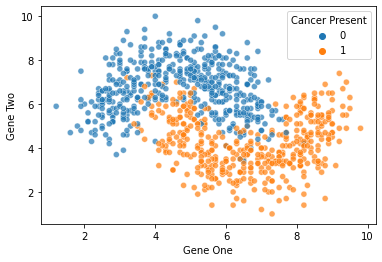

In [142]:
sns.scatterplot(data=full_test , x='Gene One' , y='Gene Two' , hue='Cancer Present',alpha=.7)

In [143]:
y_pred = knn_model.predict(scaled_x_test)

In [144]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [145]:
accuracy_score(y_test,y_pred)

0.8922222222222222

In [146]:
confusion_matrix(y_test,y_pred)

array([[420,  50],
       [ 47, 383]], dtype=int64)

In [147]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.90      0.89      0.90       470
           1       0.88      0.89      0.89       430

    accuracy                           0.89       900
   macro avg       0.89      0.89      0.89       900
weighted avg       0.89      0.89      0.89       900



In [148]:
test_error_rates = []
for k in range(1,30):
    knn_model = KNeighborsClassifier(n_neighbors=k)
    knn_model.fit(scaled_x_train,y_train)
    
    y_pred = knn_model.predict(scaled_x_test)
    
    test_error = 1-accuracy_score(y_test,y_pred)
    test_error_rates.append(test_error)

Text(0.5, 0, 'K Value')

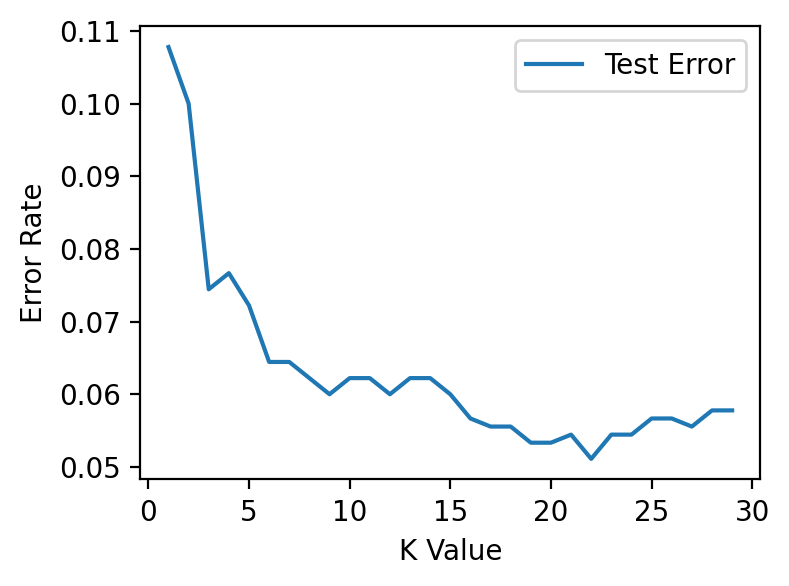

In [149]:
plt.figure(figsize=(4,3),dpi=200)
plt.plot(range(1,30),test_error_rates,label='Test Error')
plt.legend()
plt.ylabel('Error Rate')
plt.xlabel("K Value")

In [150]:
scaler = StandardScaler()

In [151]:
knn = KNeighborsClassifier()

In [152]:
operations = [('scaler',scaler) , ('knn',knn)]

In [153]:
from sklearn.pipeline import Pipeline

In [154]:
pipe = Pipeline(operations)

In [155]:
from sklearn.model_selection import GridSearchCV

In [156]:
k_val = list(range(1,20))
k_val

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]

In [157]:
param_grid = {'knn__n_neighbors' : k_val} 

In [158]:
cv_classi = GridSearchCV(pipe,param_grid,cv=5,scoring='accuracy')

In [159]:
cv_classi.fit(x_train,y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('knn', KNeighborsClassifier())]),
             param_grid={'knn__n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                              12, 13, 14, 15, 16, 17, 18, 19]},
             scoring='accuracy')

In [160]:
cv_classi.best_estimator_

Pipeline(steps=[('scaler', StandardScaler()),
                ('knn', KNeighborsClassifier(n_neighbors=14))])

In [161]:
cv_classi.cv_results_['mean_test_score']

array([0.90238095, 0.90285714, 0.91857143, 0.91333333, 0.92380952,
       0.92142857, 0.9252381 , 0.9247619 , 0.9252381 , 0.92190476,
       0.9252381 , 0.9247619 , 0.92761905, 0.92904762, 0.92809524,
       0.92809524, 0.92904762, 0.92857143, 0.92761905])

In [162]:
cv_classi.best_params_

{'knn__n_neighbors': 14}

In [163]:
scaler = StandardScaler()
knn_final = KNeighborsClassifier(n_neighbors=14)

In [164]:
operations = [('scaler',scaler) , ('knn_final', knn_final)]
pipe = Pipeline(operations)

In [165]:
pipe.fit(x_train,y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('knn_final', KNeighborsClassifier(n_neighbors=14))])

In [166]:
pipe_pred = pipe.predict(x_test)

In [174]:
sample = x_test.iloc[40]
sample

Gene One    3.8
Gene Two    6.3
Name: 194, dtype: float64

In [175]:
pipe.predict(sample.values.reshape(1,-1))

array([0], dtype=int64)

In [177]:
pipe.predict_proba(x_test)

array([[0.        , 1.        ],
       [0.        , 1.        ],
       [0.        , 1.        ],
       ...,
       [0.        , 1.        ],
       [0.28571429, 0.71428571],
       [1.        , 0.        ]])

In [178]:
pipe.predict_proba(sample.values.reshape(1,-1))

array([[0.92857143, 0.07142857]])